In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

## 1. PCA参数

In [3]:
iris_data = load_iris()
x = iris_data.data
y = iris_data.target
x = pd.DataFrame(x)
y = pd.Series(y)
x

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### n_components参数

In [7]:

pca = PCA(n_components=0.99, svd_solver="full") #保存99%的信息量
x_dr = pd.DataFrame(pca.fit_transform(x))
print(pca.explained_variance_ratio_) # 每个新特征向量的信息量占比
pca.explained_variance_              # 降维后的特征向量方差

[0.92461872 0.05306648 0.01710261]


array([4.22824171, 0.24267075, 0.0782095 ])

In [8]:
pca = PCA(n_components='mle') #根据最大似然来决定保存多少维
x_dr = pd.DataFrame(pca.fit_transform(x))
pca.explained_variance_ 

array([4.22824171, 0.24267075, 0.0782095 ])

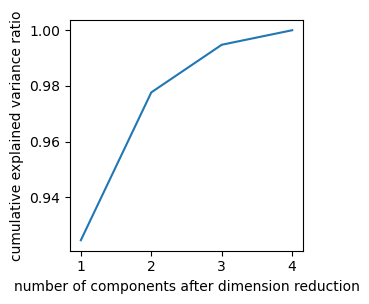

In [10]:
# 可解释信息量比率 的累计变化
plt.figure(figsize=(3,3))
pca_line = PCA().fit(x) # 不填写n_components
plt.plot([1,2,3,4],np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1,2,3,4]) #这是为了限制坐标轴显示为整数
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

### svd_solver参数

参数svd_solver是在降维过程中，用来控制矩阵分解的一些细节的参数。有四种模式可选："auto", "full", "arpack",
"randomized"，默认”auto"。  
full使用完全奇异值分解  
arpack使用的是截断奇异值分解  
svd_solver控制了不同的奇异值分解方式，用以提升速度。通常选择"auto"即可

### components_属性

components_存放了X<sup>T</sup>X的前k个单位特征矩阵(即SVD中V<sup>T</sup>)。  
Y = V<sup>T</sup>X (Y是降维后的向量空间)  

PS. 这里的X是样本矩阵的转置，即特征作为列，样本号作为行

In [11]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

In [26]:
# 人脸数据 （1348张图）
print(faces.data.shape)
print(faces.images.shape)

(1348, 2914)
(1348, 62, 47)


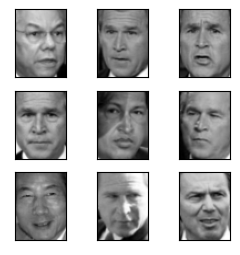

In [19]:
# 展示前9张图
def show_9img(images):
    plt.figure(figsize=(3,3))
    for i in range(9):
        ax = plt.subplot(3,3,i+1, xticks=[], yticks=[]) # xticks=[]表示不显示刻度
        ax.imshow(images[i].reshape(62,47), cmap='binary_r')

show_9img(faces.data)

(150, 2914)


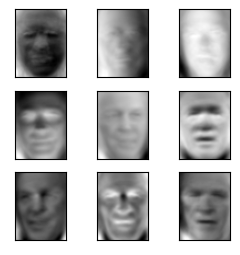

In [29]:
X = faces.data
pca_face = PCA(150)
X_dr = pca_face.fit_transform(X)
print(pca_face.components_.shape)
show_9img(pca_face.components_)

### 降维逆转
X = Y(V<sup>T</sup>)<sup>-1</sup>

In [30]:
X_inverse = pca_face.inverse_transform(X_dr)
X_inverse.shape

(1348, 2914)

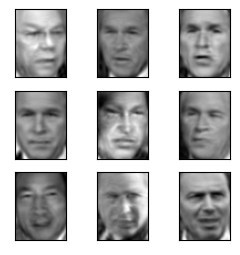

In [31]:
show_9img(X_inverse)

## 2. PCA降噪

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()
digits.data.shape

(1797, 64)

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9]


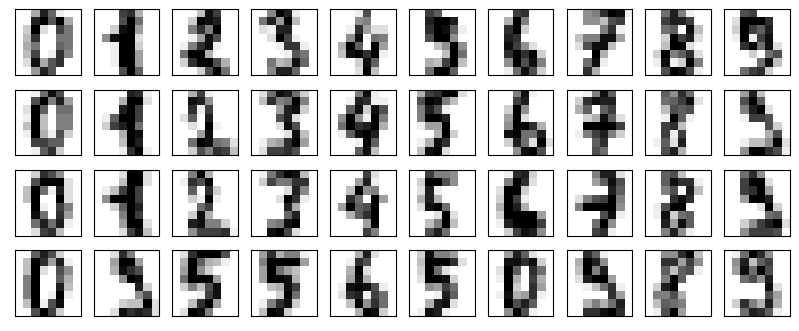

In [6]:
def plot_digits(data):
    fig, axes = plt.subplots(4,10,figsize=(10,4)
                           ,subplot_kw = {"xticks":[],"yticks":[]}
                           )
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),cmap="binary") # cmap='binary' 和='gray'相反（‘gray’中，0为黑，255为白）
        
plot_digits(digits.data)
print(digits.target[:40])

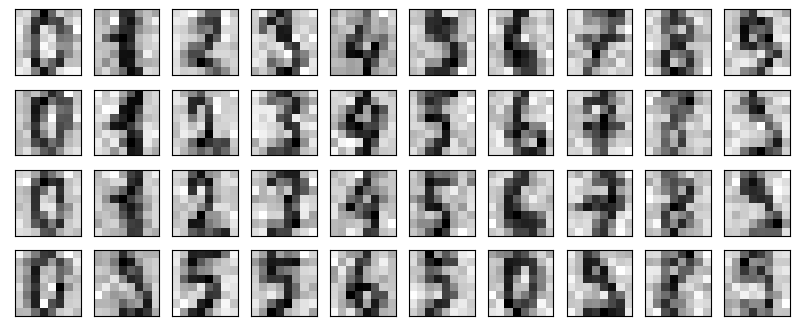

In [7]:
# 添加噪音
np.random.seed(42)
noisy = np.random.normal(0, 2, digits.data.shape)
digits_data_noisy = digits.data + noisy
# print(digits_data_noisy)
plot_digits(digits_data_noisy)

In [8]:
# 降维
pca = PCA(0.8)
X_dr = pca.fit_transform(digits_data_noisy)
X_dr.shape

(1797, 21)

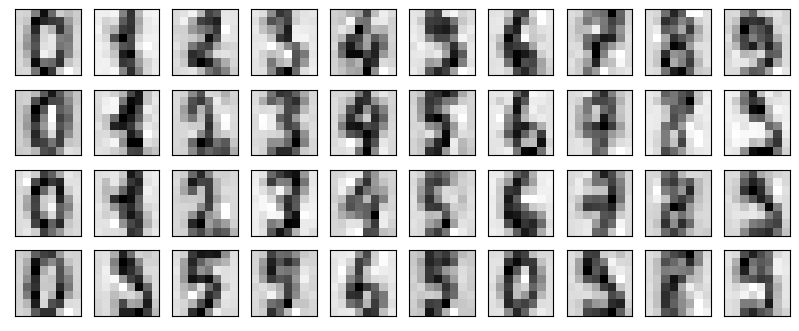

In [9]:
# 逆转降维，实现降噪
without_noise = pca.inverse_transform(X_dr)
plot_digits(without_noise)

## 实现手写数字降维

In [10]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score

In [11]:
data = pd.read_csv('./data/digit recognizor.csv')
X = data.iloc[:,1:]
y = data.iloc[:,0]
X.shape


(42000, 784)

In [12]:
pca_line = PCA().fit(X)

In [76]:
np.round(pca_line.explained_variance_ratio_,3)

array([0.097, 0.072, 0.061, 0.054, 0.049, 0.043, 0.033, 0.029, 0.028,
       0.023, 0.021, 0.021, 0.017, 0.017, 0.016, 0.015, 0.013, 0.013,
       0.012, 0.012, 0.011, 0.01 , 0.01 , 0.009, 0.009, 0.008, 0.008,
       0.008, 0.007, 0.007, 0.007, 0.006, 0.006, 0.006, 0.006, 0.005,
       0.005, 0.005, 0.005, 0.005, 0.005, 0.004, 0.004, 0.004, 0.004,
       0.004, 0.004, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003,
       0.003, 0.003, 0.003, 0.003, 0.003, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001,

Text(0, 0.5, 'cumulative explained variance ratio')

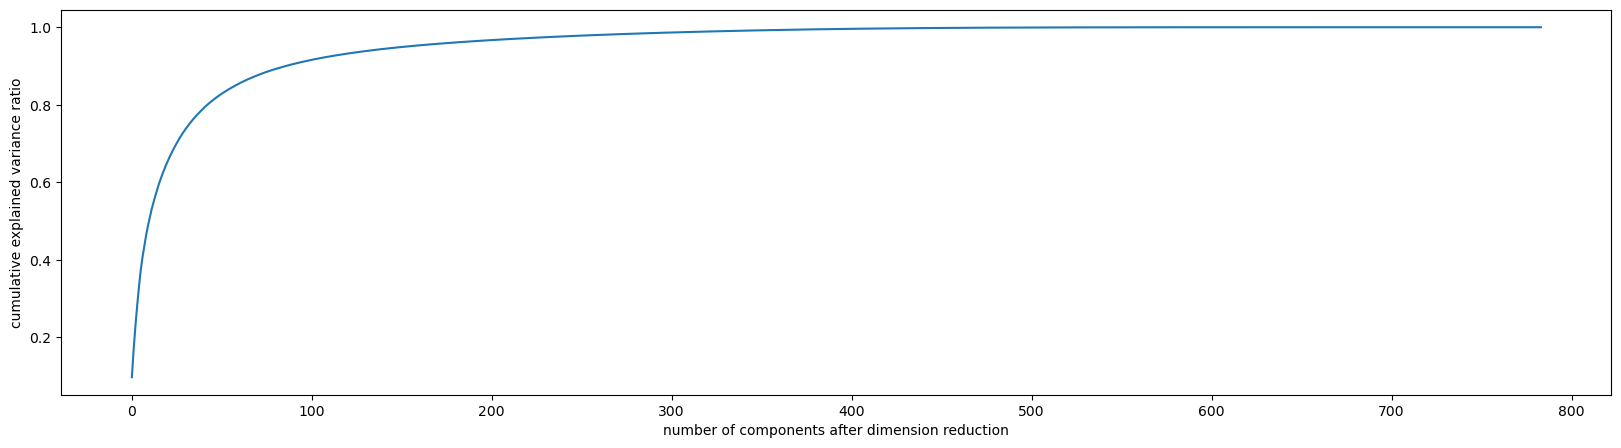

In [77]:
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")

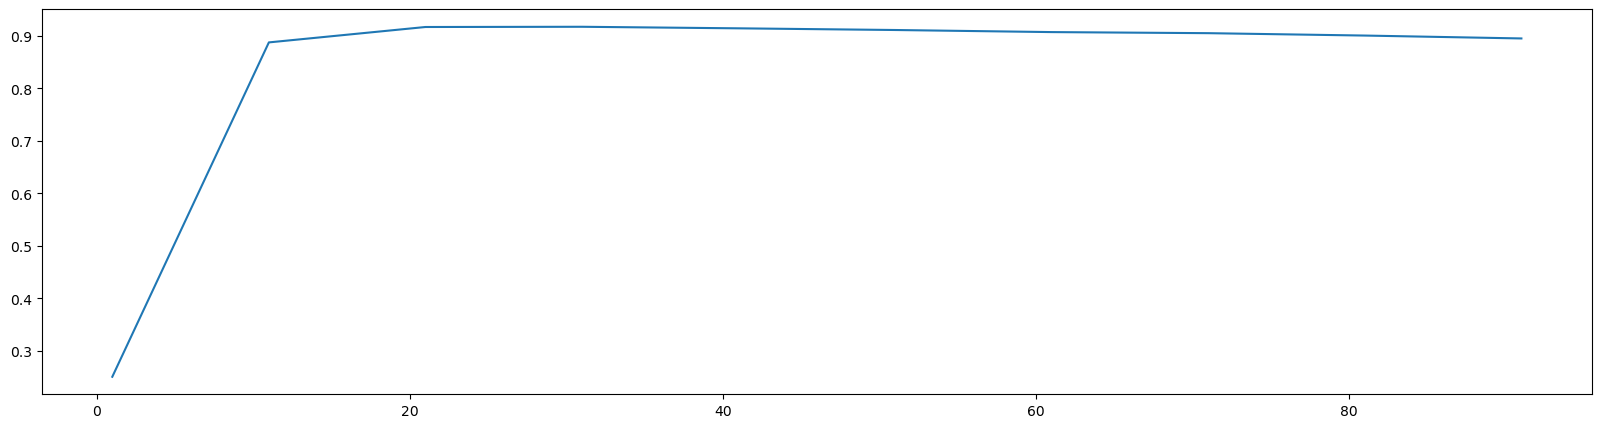

In [13]:
# 调超参
#======【TIME WARNING：2mins 30s】======#
scores = []
for i in range(1,101,10):
    X_dr = PCA(i).fit_transform(X)
    score = cross_val_score(RFC(n_estimators=10,random_state=2)
                           ,X_dr,y,cv=5).mean()
    scores.append(score)
plt.figure(figsize=[20,5])
plt.plot(range(1,101,10),scores)

27

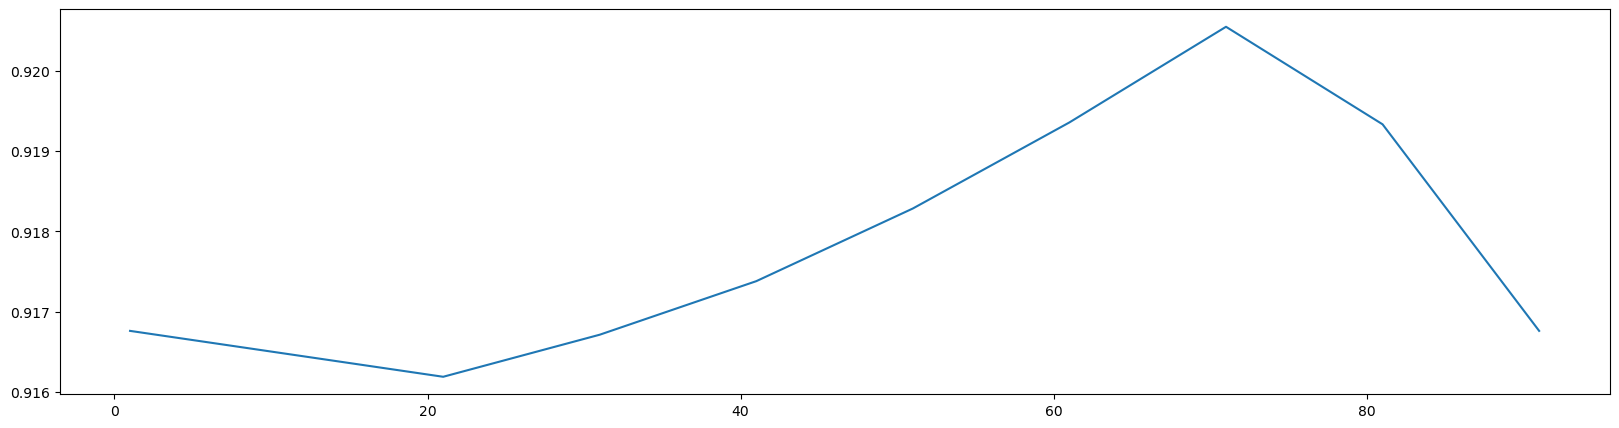

In [17]:
# 细化调参
scores = []
k_list = [*range(20,30)]
for i in k_list:
    X_dr = PCA(i).fit_transform(X)
    score = cross_val_score(RFC(n_estimators=10,random_state=2)
                           ,X_dr,y,cv=5).mean()
    scores.append(score)
plt.figure(figsize=[20,5])
plt.plot(k_list,scores)


k_list[np.argmax(scores)]

In [18]:
# 用随机森林跑一个5折交叉验证，看一下评分
X_dr = PCA(27).fit_transform(X)
score = cross_val_score(RFC(n_estimators=50,random_state=2),
                      X_dr, 
                      y,
                      cv=5).mean()
score

0.9445238095238097

使用KNN测试

In [19]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [20]:
scores = []
X_dr = PCA(27).fit_transform(X)
for i in range(5):
    score = cross_val_score(KNN(2*i+1),X_dr,y,cv=5).mean()
    scores.append(score)


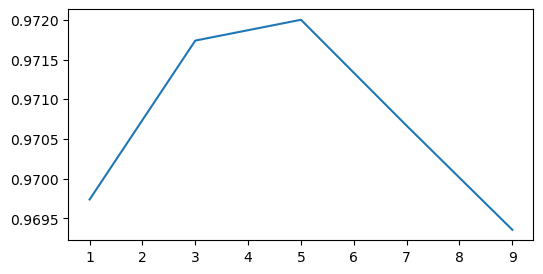

In [21]:
plt.figure(figsize=(6,3))
plt.plot([2*i+1 for i in range(5)],scores)

In [ ]:
cross_val_score(KNN(n_neighbors=5), X_dr,y,cv=5).mean()